Class distribution and basic statistics:
              user  \
count          117   
unique         117   
top     IDUS103408   
freq             1   

       Democratic Party: In politics, there is often talk of right and left. Where would you rank the following parties on this scale?  \
count                                                 117                                                                                
unique                                                  8                                                                                
top                                          Extreme Left                                                                                
freq                                                   82                                                                                

       Republican Party: In politics, there is often talk of right and left. Where would you rank the following parties on this scale?  \
count              

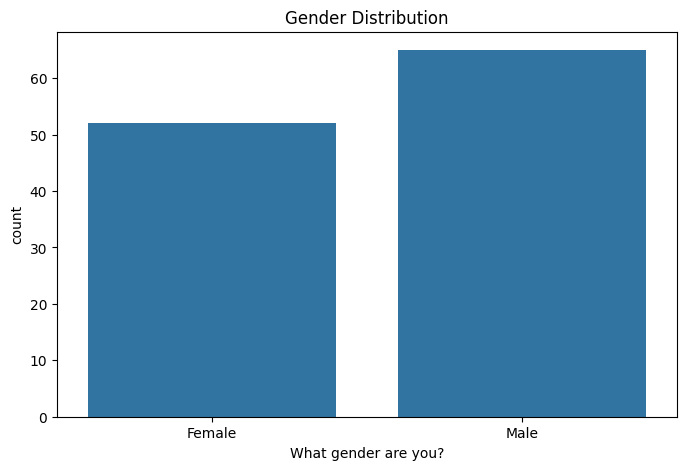

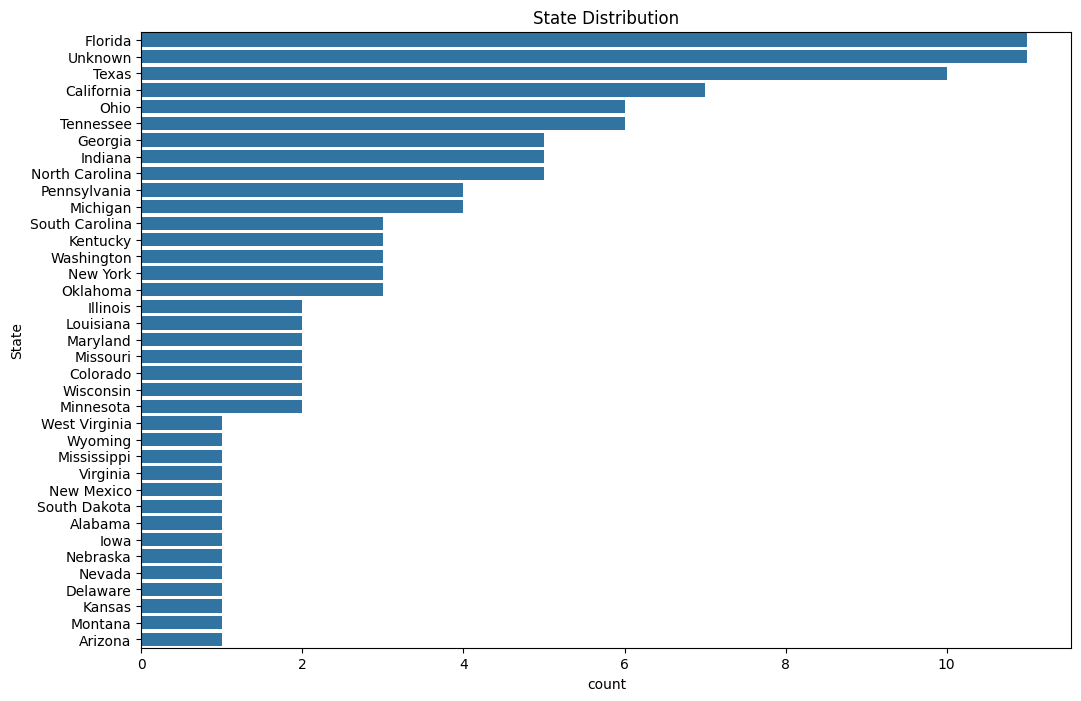

C:\Users\miria\AppData\Local\Temp\ipykernel_14940\2045831904.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Where would you place your own political position?", data=df, palette='coolwarm')


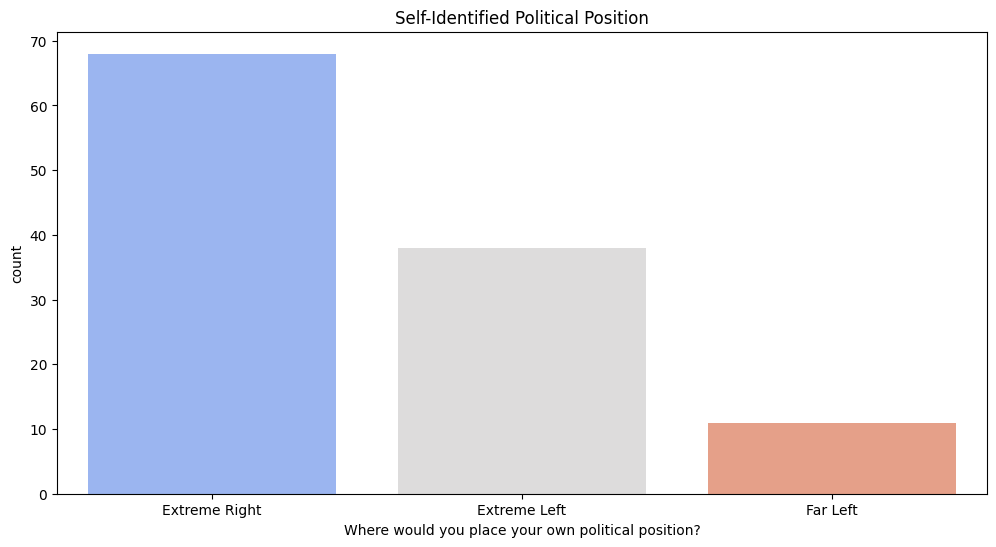

C:\Users\miria\AppData\Local\Temp\ipykernel_14940\2045831904.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is the highest educational level that you have?", data=df, palette='viridis')


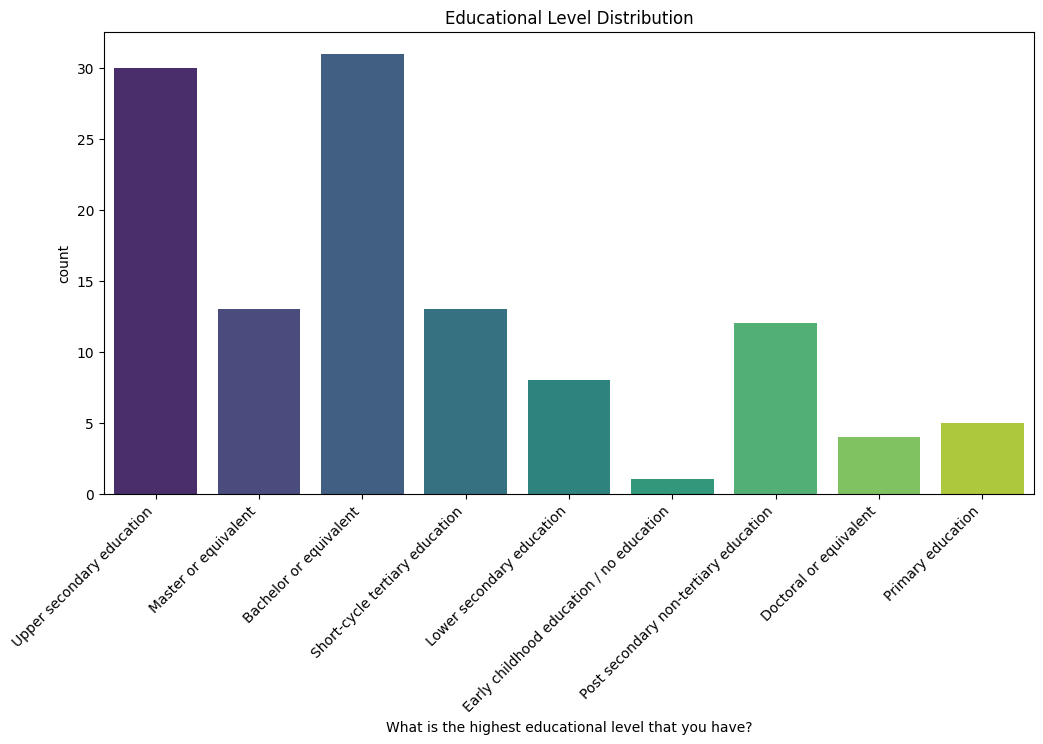

C:\Users\miria\AppData\Local\Temp\ipykernel_14940\2045831904.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is your employment status?", data=df, palette='magma')


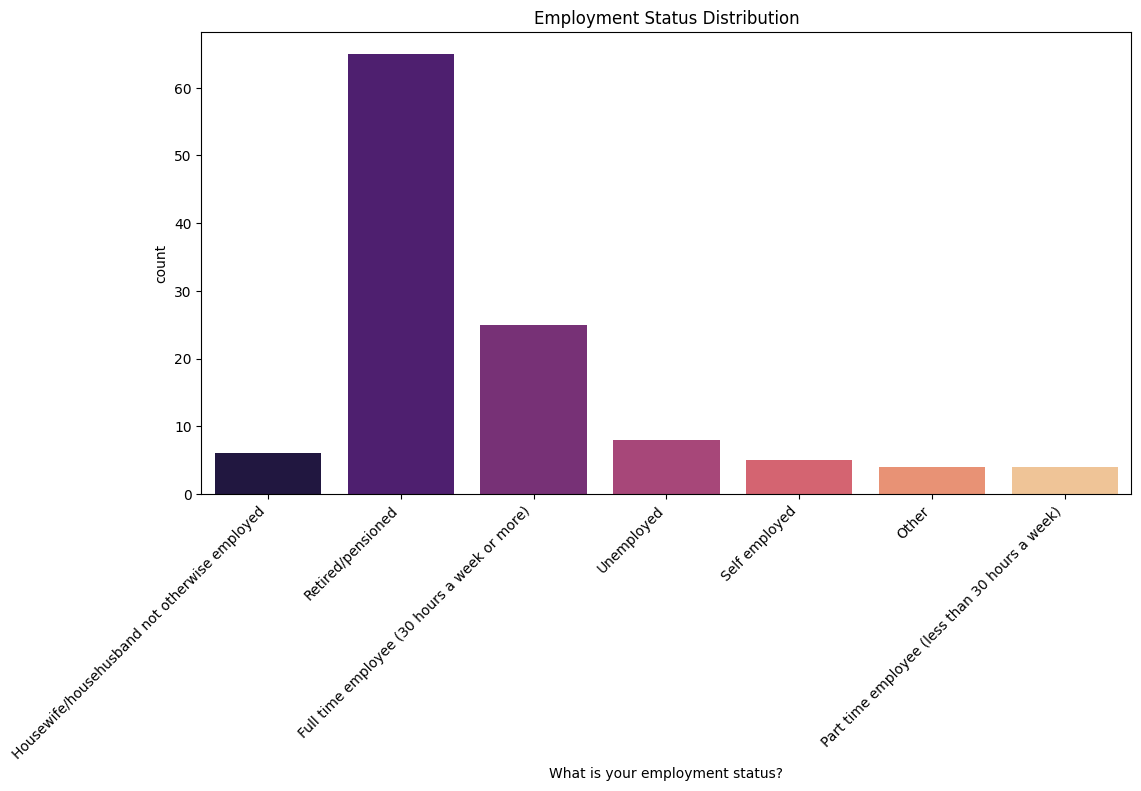

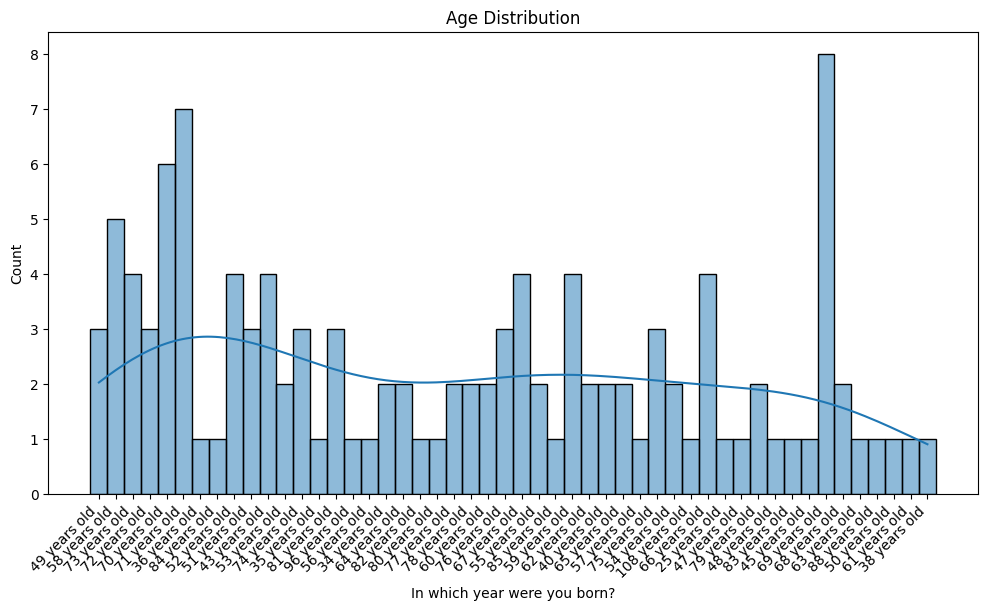

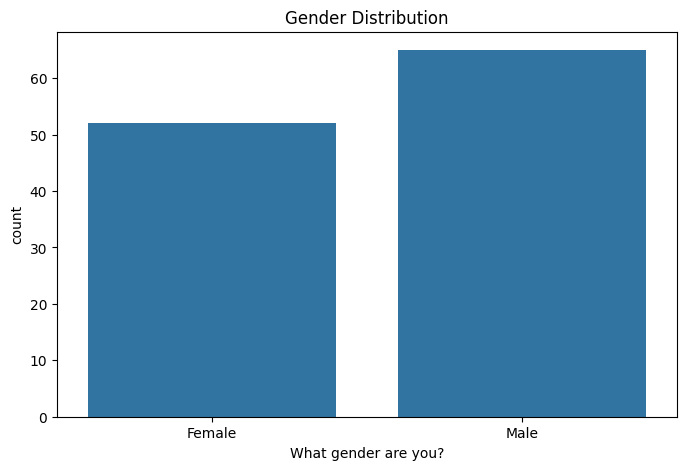

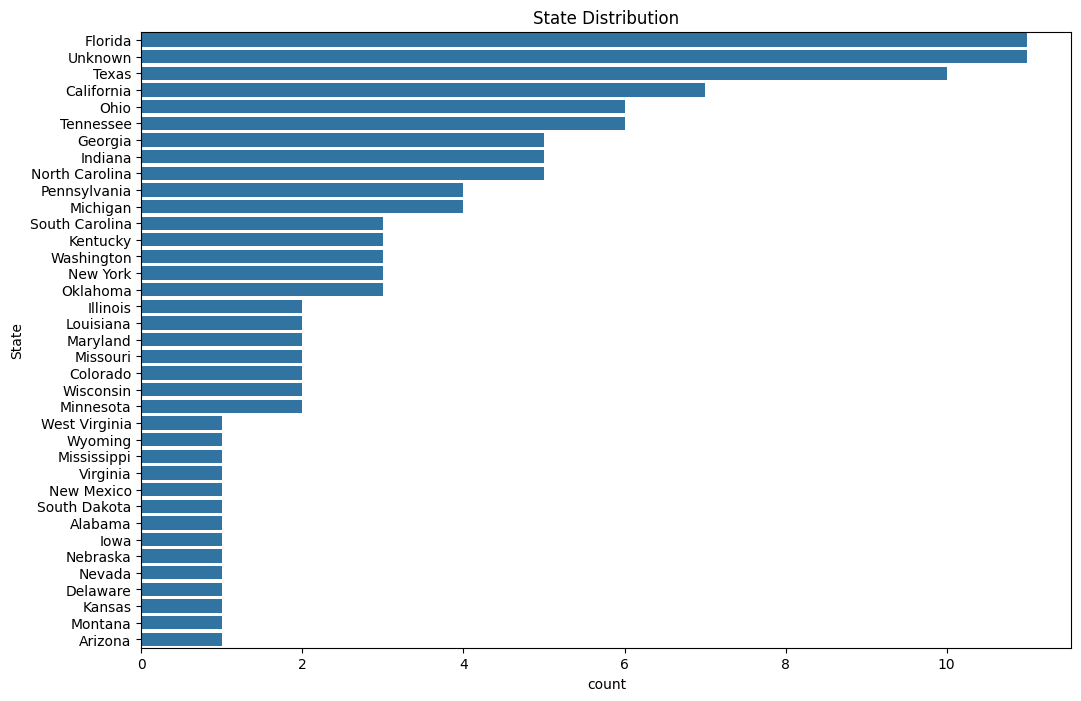

C:\Users\miria\AppData\Local\Temp\ipykernel_14940\410949434.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Political Position", data=df, palette='coolwarm')


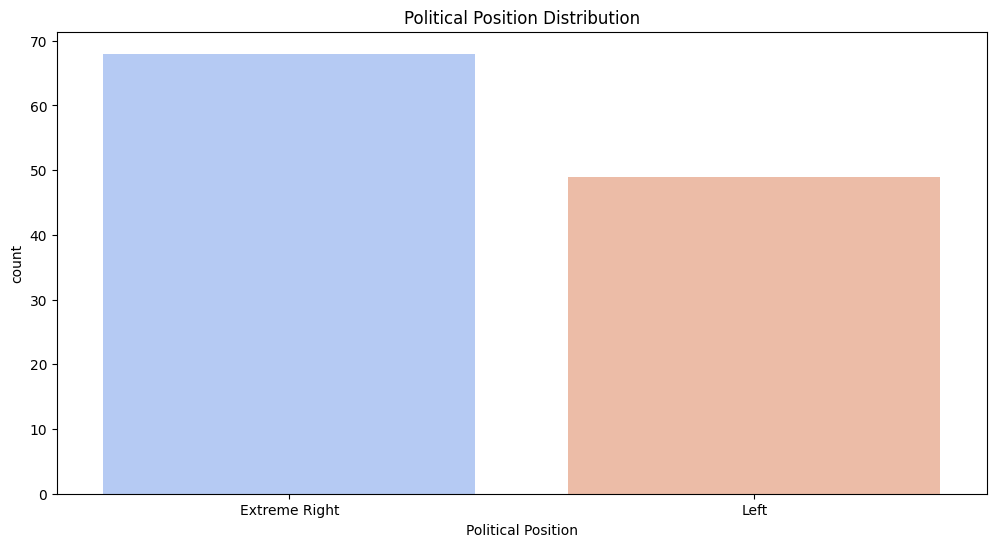

C:\Users\miria\AppData\Local\Temp\ipykernel_14940\410949434.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is the highest educational level that you have?", data=df, palette='viridis')


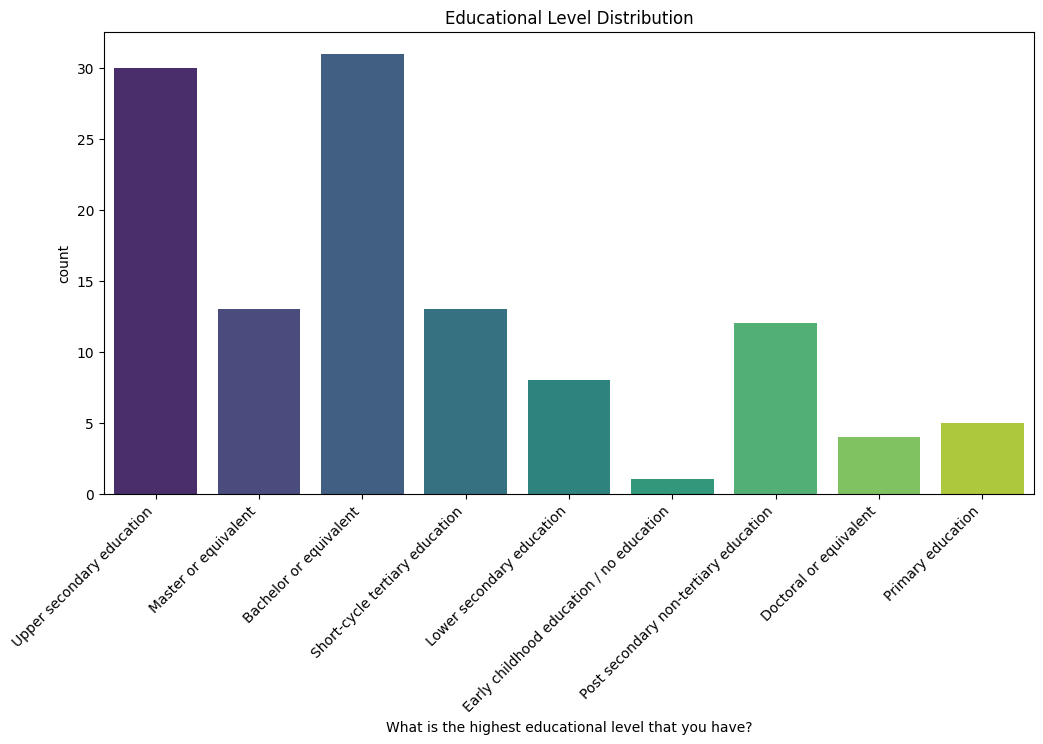

C:\Users\miria\AppData\Local\Temp\ipykernel_14940\410949434.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="What is your employment status?", data=df, palette='magma')


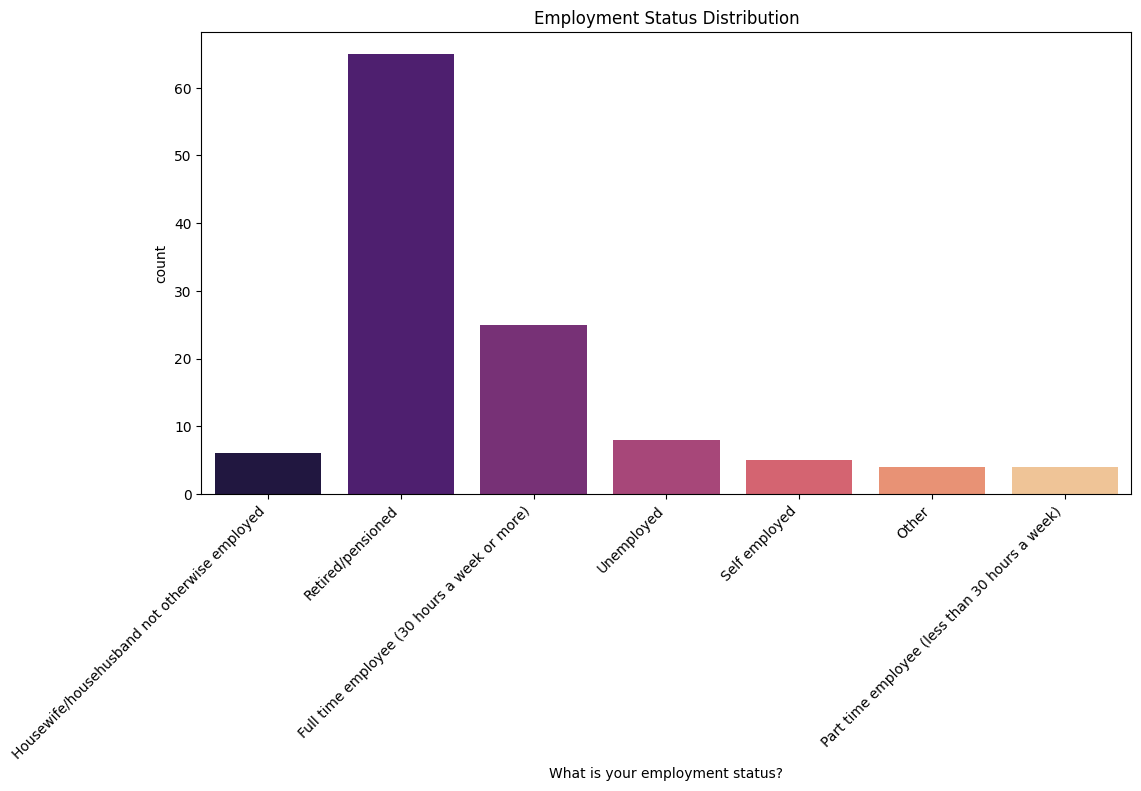

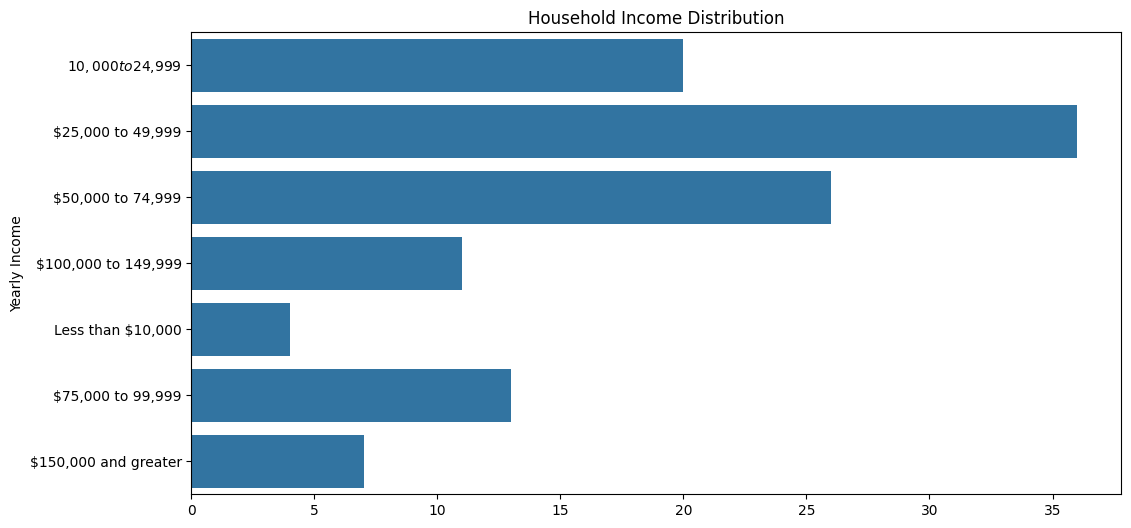

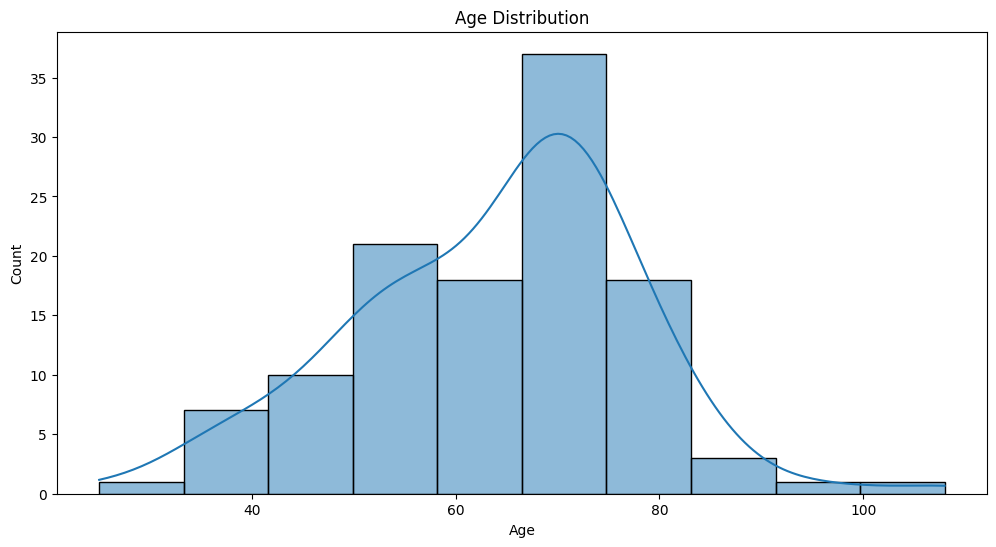

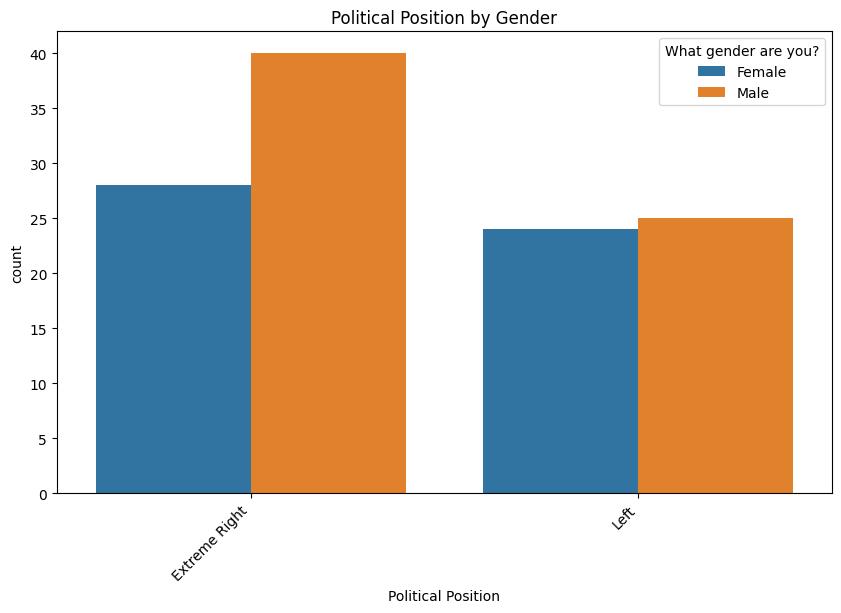

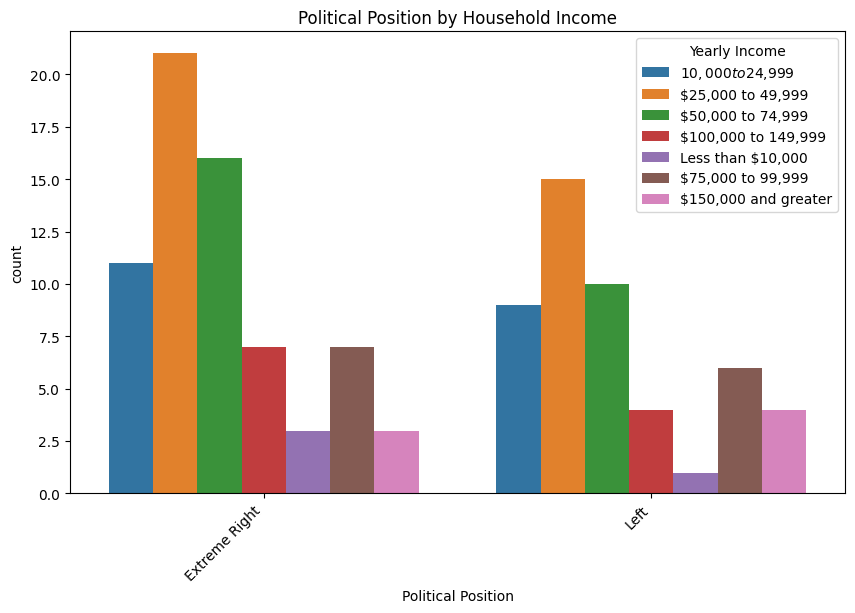

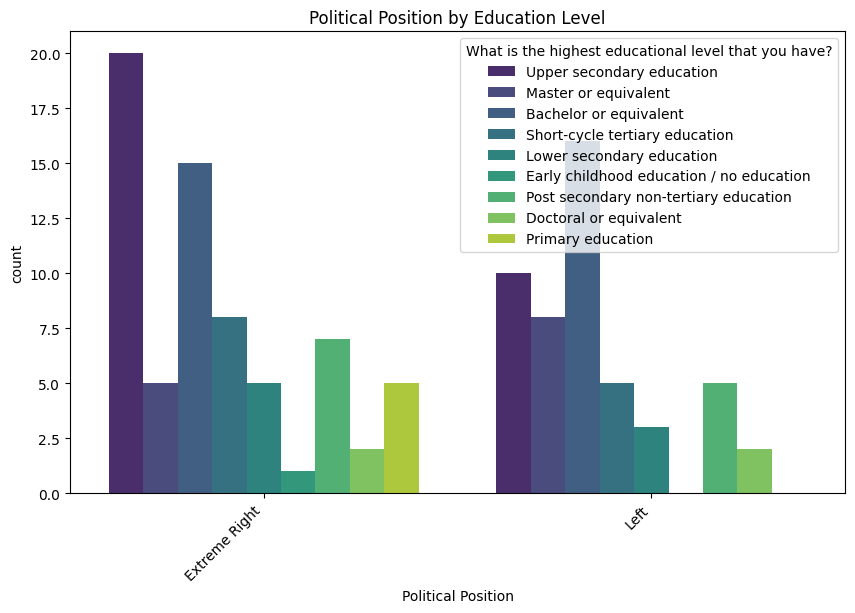

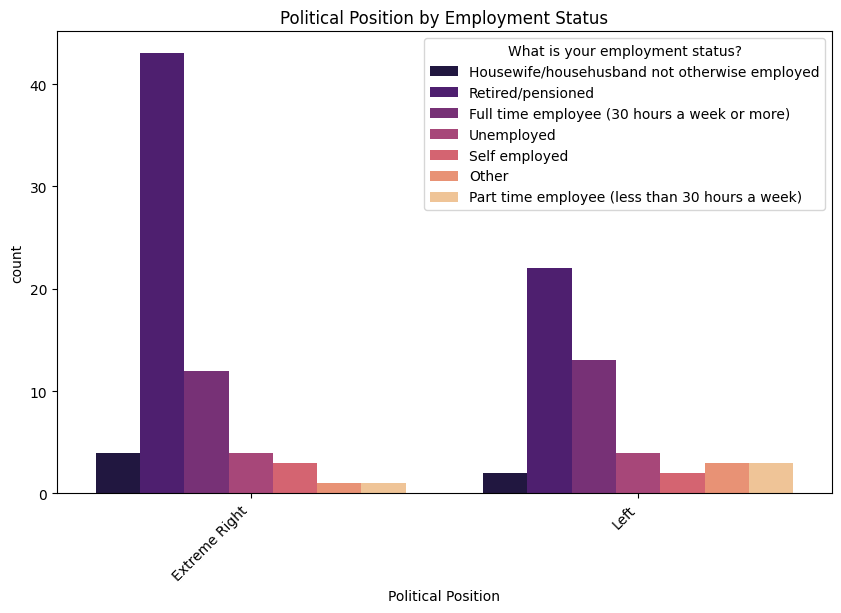

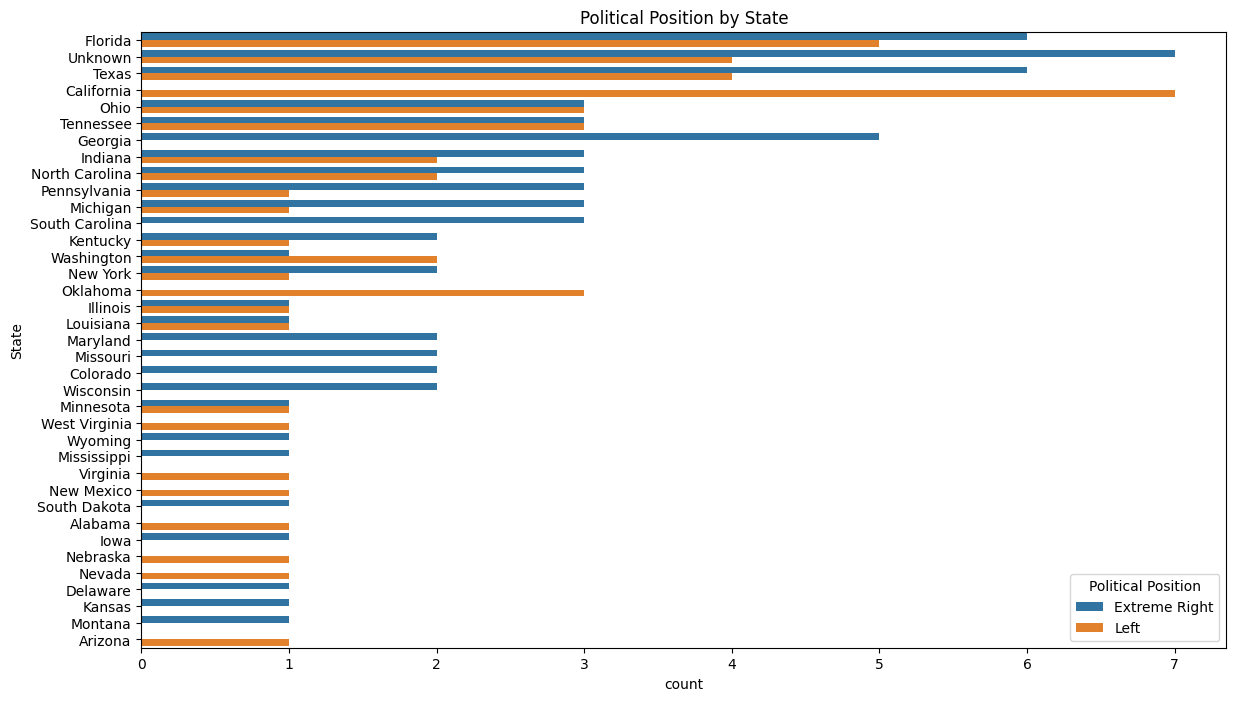

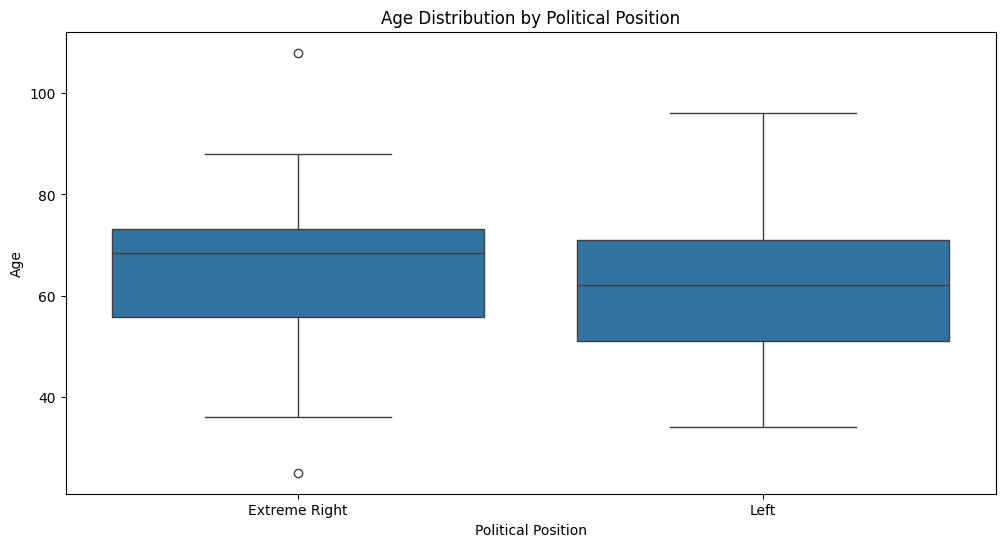

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import io

def main():
    # Load data
    data = Path('../data/processed/combined_data.csv').read_text()
    df = pd.read_csv(io.StringIO(data))

    # Extract state from location
    def extract_state(location):
        match = re.search(r',\s*([A-Za-z\s]+)(?=\s*\d{5}|$)', location)
        return match.group(1) if match else "Unknown"

    df['State'] = df['What is your ZIP code?'].apply(extract_state)

    # Merge political opinions
    df['Political Position'] = df["Where would you place your own political position?"].replace({
        'Extreme Left': 'Left',
        'Far Left': 'Left'
    })

    # Gender distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x="What gender are you?", data=df)
    plt.title('Gender Distribution')
    plt.show()

    # State distribution
    plt.figure(figsize=(12, 8))
    sns.countplot(y="State", data=df, order=df['State'].value_counts().index)
    plt.title('State Distribution')
    plt.show()

    # Political position distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(x="Political Position", data=df, palette='coolwarm')
    plt.title('Political Position Distribution')
    plt.show()

    # Education level distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(x="What is the highest educational level that you have?", data=df, palette='viridis')
    plt.title('Educational Level Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Employment status distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(x="What is your employment status?", data=df, palette='magma')
    plt.title('Employment Status Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Income distribution
    plt.figure(figsize=(12, 6))
    income_plot = sns.countplot(y="What is your approximate yearly household net income? Please indicate which category your household is in if you add together the monthly net income of all household members: All wages, salaries, pensions and other incomes after payroll taxes e.g. social security (OASDI), medicare taxes, unemployment taxes.", data=df)
    plt.title('Household Income Distribution')
    income_plot.set_xlabel('')
    income_plot.set_ylabel('Yearly Income')
    plt.show()

    # Handle age column: Extract the numeric part (assuming it's the age)
    def extract_age(value):
        match = re.search(r'(\d+)', str(value))
        return int(match.group(1)) if match else None

    df['Age'] = df['In which year were you born?'].apply(extract_age)

    # Age distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Age'], bins=10, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.show()

    # Correlation analyses

    # Correlate own political position with gender
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Political Position", hue="What gender are you?", data=df)
    plt.title('Political Position by Gender')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Correlate own political position with income
    plt.figure(figsize=(10, 6))
    income_plot = sns.countplot(x="Political Position", 
                                hue="What is your approximate yearly household net income? Please indicate which category your household is in if you add together the monthly net income of all household members: All wages, salaries, pensions and other incomes after payroll taxes e.g. social security (OASDI), medicare taxes, unemployment taxes.",
                                data=df)
    income_plot.legend(title='Yearly Income')
    plt.title('Political Position by Household Income')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Correlate own political position with education level
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Political Position", 
                  hue="What is the highest educational level that you have?", 
                  data=df, palette='viridis')
    plt.title('Political Position by Education Level')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Correlate own political position with employment status
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Political Position", 
                  hue="What is your employment status?", 
                  data=df, palette='magma')
    plt.title('Political Position by Employment Status')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Correlate own political position with state
    plt.figure(figsize=(14, 8))
    sns.countplot(y="State", hue="Political Position", 
                  data=df, order=df['State'].value_counts().index)
    plt.title('Political Position by State')
    plt.show()

    # Correlate age with political position
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Political Position", y="Age", data=df)
    plt.title('Age Distribution by Political Position')
    plt.xlabel('Political Position')
    plt.ylabel('Age')
    plt.show()

if __name__ == '__main__':
    main()
